In [1]:
import subprocess
import os
import sys

PROJECT_ROOT = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

bids_dir = os.path.join(PROJECT_ROOT, "data")
output_dir = os.path.join(PROJECT_ROOT, "output")
fs_license = os.path.join(PROJECT_ROOT, "license.txt")
work_dir = os.path.join(PROJECT_ROOT, "work")
subject = "101410"

from nilearn import plotting, masking, image
from nilearn.image import math_img, concat_imgs, resample_to_img
from nipype.interfaces import fsl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [3]:
data_folder = 'data'
fmri_data_dir = os.path.join(data_folder, 'fMRI')
fmri_output_dir = os.path.join(output_dir, 'fmri')
os.makedirs(fmri_output_dir, exist_ok=True)

t1w_file = os.path.join(data_folder, 'T1w/T1w.nii.gz')

try:
    result = subprocess.run(['ls', '-R', bids_dir], 
                            capture_output=True, 
                            text=True, 
                            check=True)
    print(result.stdout)

except subprocess.CalledProcessError as e:
    print(f"Error checking directory: {e.stderr}")
except FileNotFoundError:
    print("Error: 'ls' command not found.")

/home/jovyan/Labs/NX-421-project/data:
T1w
dataset_description.md
fMRI
subject101410-20251101T143453Z-1-001
subject101410-20251101T143453Z-1-001.zip
task-motor_bold.json
tfMRI_MOTOR_RL-20251101T121843Z-1-001
tfMRI_MOTOR_RL-20251101T121843Z-1-001.zip

/home/jovyan/Labs/NX-421-project/data/T1w:
T1w.nii.gz

/home/jovyan/Labs/NX-421-project/data/fMRI:
tfMRI_MOTOR_LR
tfMRI_MOTOR_RL

/home/jovyan/Labs/NX-421-project/data/fMRI/tfMRI_MOTOR_LR:
events_LR.csv
tfMRI_MOTOR_LR.nii

/home/jovyan/Labs/NX-421-project/data/fMRI/tfMRI_MOTOR_RL:
events_RL.csv
tfMRI_MOTOR_RL.nii

/home/jovyan/Labs/NX-421-project/data/subject101410-20251101T143453Z-1-001:
subject101410

/home/jovyan/Labs/NX-421-project/data/subject101410-20251101T143453Z-1-001/subject101410:

/home/jovyan/Labs/NX-421-project/data/tfMRI_MOTOR_RL-20251101T121843Z-1-001:
tfMRI_MOTOR_RL

/home/jovyan/Labs/NX-421-project/data/tfMRI_MOTOR_RL-20251101T121843Z-1-001/tfMRI_MOTOR_RL:
events_RL.csv
tfMRI_MOTOR_RL.nii



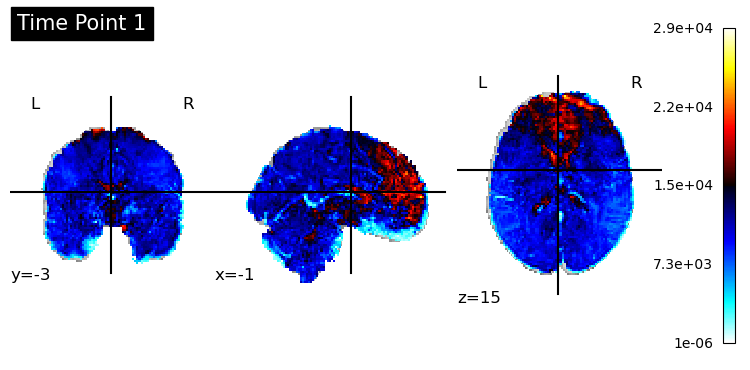

In [9]:
fMRI_file = os.path.join(data_folder, 'fMRI/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii')
import nilearn.image as niimg
from nilearn.plotting import plot_stat_map

# Path to your 4D .nii file
file_path = fMRI_file

# Load the 4D fMRI data
fmri_img_4d = niimg.load_img(file_path)

# Extract a specific volume/timepoint (for example, the first volume)
volume_index = 0  # change this index to choose different time points
fmri_img_3d = niimg.index_img(fmri_img_4d, volume_index)

# Now you can plot this specific 3D volume
plot_stat_map(fmri_img_3d, title=f"Time Point {volume_index + 1}")



In [14]:
import pandas as pd
fMRI_event = os.path.join(data_folder, 'fMRI/tfMRI_MOTOR_LR/events_LR.csv')
# Load your events CSV file into a pandas DataFrame
events = pd.read_csv(fMRI_event)

# Show the first few rows to check the data
print(events_df.head())


   onset  duration condition
0    0.0       8.0       NaN
1    8.0       3.0       cue
2   11.0      12.0        rh
3   23.0       3.0       cue
4   26.0      12.0        lf


In [ ]:
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel

# Specify what sort of GLM we want (nature of the noise, repetition time of the data and other parameters)
fmri_glm = FirstLevelModel(t_r=7,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None,
                           high_pass=.01)

# Fit the model to our design and data
fmri_glm = fmri_glm.fit(fmri_img_4d, events)

/opt/conda/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: condition
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)


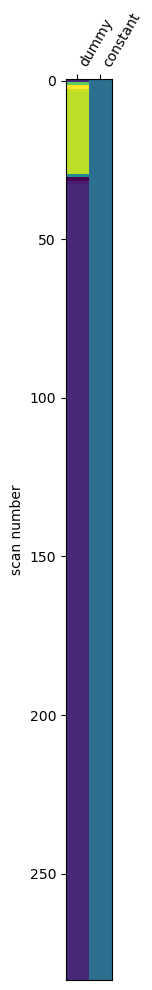

In [16]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(fmri_glm.design_matrices_[0])
plt.show()